In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

import warnings
warnings.filterwarnings('ignore')

In [90]:
fpath = ('london_weather_MODIFIED - london_weather_MODIFIED.csv')
df = pd.read_csv(fpath)
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


In [91]:
## preview first row from the date column (string)
df.loc[0,'date']



19790101

In [92]:
fmt = "%Y%m%d"

In [93]:
df['date'] = pd.to_datetime(df['date'], format=fmt)

In [94]:
# Set date column as index
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN


In [95]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [96]:
df.loc['2000']

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2000-01-01,7.00,0.40,18.00,10.80,7.00,4.90,0.00,"102,450.00",0.00
2000-01-02,7.00,0.70,20.00,11.50,7.90,5.00,0.20,"102,530.00",0.00
2000-01-03,8.00,0.00,13.00,9.50,9.40,7.20,6.00,"101,860.00",0.00
2000-01-04,5.00,2.90,34.00,11.00,7.00,4.40,0.20,"101,480.00",0.00
2000-01-05,5.00,1.30,25.00,10.80,6.40,1.90,0.80,"101,420.00",0.00
...,...,...,...,...,...,...,...,...,...
2000-12-27,7.00,0.10,14.00,2.90,2.20,1.50,1.80,"99,350.00",0.00
2000-12-28,2.00,4.10,39.00,1.20,-0.30,-3.50,0.00,"99,500.00",2.00
2000-12-29,2.00,5.60,45.00,3.10,-2.20,-5.50,0.00,"99,950.00",1.00


In [97]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]

df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,NaN
2020-12-28,0.20,1.10,-1.30,3.60,NaN
2020-12-29,0.00,2.60,1.10,4.10,NaN


In [98]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [99]:
## interpolating temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [100]:
df.isna().sum()


precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [101]:
# filling preciptation/snow with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [102]:
df.isna().sum()


precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

In [103]:
from matplotlib import dates as mdates


In [104]:
precipitation_col = ['precipitation']
plot_df = df.loc['2000':,precipitation_col]
plot_df

,precipitation
date,
2000-01-01,0.00
2000-01-02,0.20
2000-01-03,6.00
2000-01-04,0.20
2000-01-05,0.80
...,...
2020-12-27,2.00
2020-12-28,0.20
2020-12-29,0.00


In [105]:
ts = df['precipitation'].copy()
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [106]:
ts_MS = ts.asfreq("MS")
ts_MS

date
2000-01-01   0.00
2000-02-01   9.80
2000-03-01   0.20
2000-04-01   0.60
2000-05-01   0.00
             ... 
2020-08-01   0.00
2020-09-01   0.00
2020-10-01   4.00
2020-11-01   0.40
2020-12-01   0.00
Freq: MS, Name: precipitation, Length: 252, dtype: float64

In [107]:
ts_MS.max()

16.0

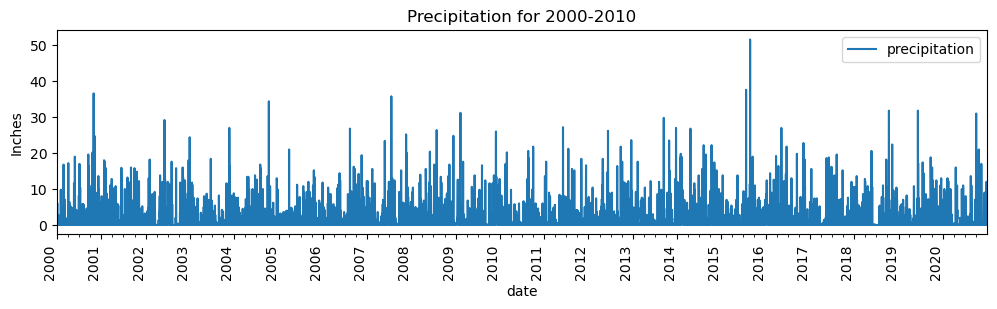

In [112]:
ax = plot_df.plot(figsize=(12,3))
ax.set( title='Precipitation for 2000-2010',
      ylabel='Inches')

# customize major ticks 
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)

ax.xaxis.set_minor_locator(minor_loc)


## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

# What month had the most precipitation between 2000 through 2010?
## April of 2016 had the most precipitation. 

# Q2 Series

In [110]:
ts = df['mean_temp'].copy()
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [111]:
ts_Y = ts.asfreq("Y")
ts_Y

date
2000-12-31    2.80
2001-12-31    1.00
2002-12-31    7.30
2003-12-31    3.30
2004-12-31   10.60
2005-12-31    5.40
2006-12-31    8.70
2007-12-31    6.70
2008-12-31   -0.80
2009-12-31    3.90
2010-12-31    5.90
2011-12-31    9.20
2012-12-31    8.60
2013-12-31    8.00
2014-12-31    2.20
2015-12-31    9.50
2016-12-31    4.60
2017-12-31   10.30
2018-12-31    9.40
2019-12-31    7.10
2020-12-31   -0.80
Freq: A-DEC, Name: mean_temp, dtype: float64

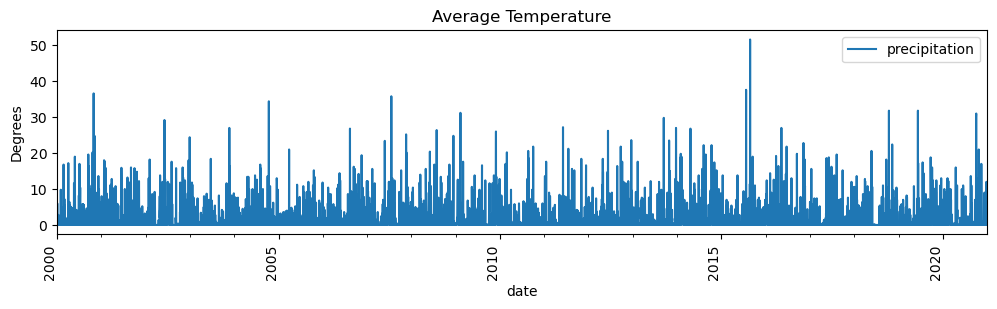

In [115]:
ax = plot_df.plot(figsize=(12,3))
ax.set( title='Average Temperature',
      ylabel='Degrees')

# customize major ticks 
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.YearLocator(1)

ax.xaxis.set_minor_locator(minor_loc)


## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

In [117]:
df['mean_temp'].min()

-4.1

In [120]:
df['mean_temp'].mean()

11.903089558075871

# Which year between 2000-2020 had the coolest average temperature?
## 2003 had the coolest average temperature.